<a href="https://colab.research.google.com/github/Dhairyajeet-singh/Facial-Emotion-Recognition/blob/main/FER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:

!kaggle datasets download -d msambare/fer2013

Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
 96% 58.0M/60.3M [00:00<00:00, 151MB/s]
100% 60.3M/60.3M [00:00<00:00, 142MB/s]


In [3]:
!chmod 600 /root/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [4]:
import zipfile
zip_data = zipfile.ZipFile('/content/fer2013.zip')
zip_data.extractall('/content/')
zip_data.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,LSTM,Reshape
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.pyplot as plt
from keras.layers import Dropout, BatchNormalization
import numpy as np

In [6]:
emotions = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [7]:
image=cv2.imread('/content/train/angry/Training_10118481.jpg')

array([[[ 50,  50,  50],
        [ 32,  32,  32],
        [ 15,  15,  15],
        ...,
        [133, 133, 133],
        [151, 151, 151],
        [ 86,  86,  86]],

       [[ 57,  57,  57],
        [ 34,  34,  34],
        [ 22,  22,  22],
        ...,
        [138, 138, 138],
        [151, 151, 151],
        [ 89,  89,  89]],

       [[ 61,  61,  61],
        [ 30,  30,  30],
        [ 24,  24,  24],
        ...,
        [142, 142, 142],
        [149, 149, 149],
        [ 89,  89,  89]],

       ...,

       [[103, 103, 103],
        [100, 100, 100],
        [100, 100, 100],
        ...,
        [149, 149, 149],
        [104, 104, 104],
        [ 85,  85,  85]],

       [[107, 107, 107],
        [111, 111, 111],
        [113, 113, 113],
        ...,
        [151, 151, 151],
        [120, 120, 120],
        [ 86,  86,  86]],

       [[104, 104, 104],
        [104, 104, 104],
        [112, 112, 112],
        ...,
        [143, 143, 143],
        [136, 136, 136],
        [ 83,  83,  83]]], dtype=uint8)
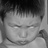

In [8]:
image

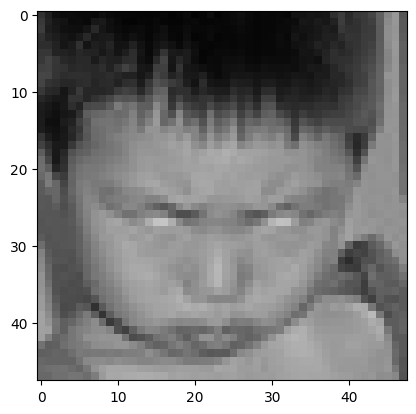

In [9]:
plt.imshow(image)

In [10]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
train_generator = train_datagen.flow_from_directory('/content/train',
                                                    target_size=(48,48),
                                                    batch_size=32,
                                                    class_mode='categorical')
validation_generator=test_datagen.flow_from_directory('/content/test',
                                                    target_size=(48,48),
                                                    batch_size=32,
                                                    class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [13]:
emotions

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [14]:
len(train_generator)

898

In [15]:
print(f'Number of batch: {len(train_generator)}')
print(f'Number of batch: {len(validation_generator)}')

Number of batch: 898
Number of batch: 225


In [16]:
x_train, y_train = next(train_generator)

In [17]:
y_train[:5]

array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [18]:
x_train.shape


(32, 48, 48, 3)

In [19]:
y_train.shape

(32, 7)

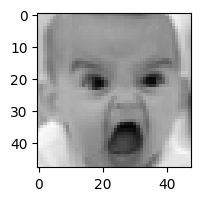

In [20]:
plt.figure(figsize=(10,2))
plt.imshow(x_train[3])

In [21]:
emotions[np.argmax(y_train[3])]

'angry'

happy
happy
sad
angry
happy


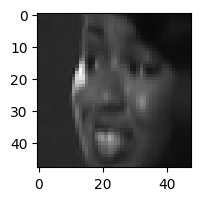

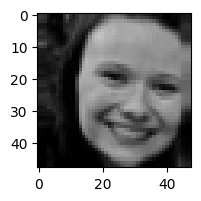

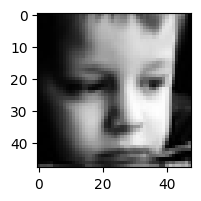

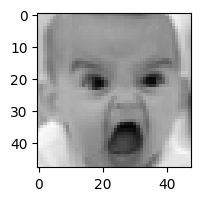

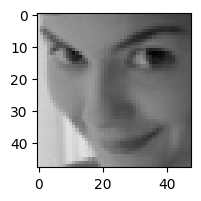

In [22]:
for i in range(5):
  plt.figure(figsize=(10,2))
  plt.imshow(x_train[i])
  print(emotions[np.argmax(y_train[i])])

In [23]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3),strides=1,padding='valid',activation='relu',input_shape=(48,48,3))),
model.add(BatchNormalization()),
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid')),

model.add(Conv2D(64, kernel_size=(3,3),strides=1,padding='valid',activation='relu',input_shape=(48,48,3))),
model.add(BatchNormalization()),
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid')),

model.add(Conv2D(128, kernel_size=(3,3),strides=1,padding='valid',activation='relu',input_shape=(48,48,3))),
model.add(BatchNormalization()),
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid')),

model.add(Reshape((16, 128)))
model.add(LSTM(64, return_sequences=True)),  # Return sequences for another LSTM layer
model.add(LSTM(64))  # Final LSTM layer

model.add(Dense(128,activation='relu')),
model.add(Dense(64,activation='relu')),
model.add(Dense(7,activation='softmax'))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 46, 46, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 21, 21, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 16, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 16, 64)              │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 193,607 (756.28 KB)

 Trainable params: 193,159 (754.53 KB)

 Non-trainable params: 448 (1.75 KB)

In [25]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [26]:
total_samples_train = train_generator.samples

# Define the batch size (make sure it's the same as in `flow_from_directory`)
batch_size = train_generator.batch_size

# Calculate steps_per_epoch
steps_per_epoch = total_samples_train // batch_size

In [27]:
steps_per_epoch

897

In [28]:
mod=model.fit(train_generator,steps_per_epoch=steps_per_epoch,epochs=10,validation_data=validation_generator)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


897/897 ━━━━━━━━━━━━━━━━━━━━ 59s 55ms/step - accuracy: 0.3116 - loss: 1.6986 - val_accuracy: 0.3851 - val_loss: 1.5565
Epoch 2/10
  1/897 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.4375 - loss: 1.3857

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


897/897 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4375 - loss: 1.3857 - val_accuracy: 0.3924 - val_loss: 1.5454
Epoch 3/10
897/897 ━━━━━━━━━━━━━━━━━━━━ 47s 52ms/step - accuracy: 0.4552 - loss: 1.4152 - val_accuracy: 0.2179 - val_loss: 1.9495
Epoch 4/10
897/897 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3750 - loss: 1.3146 - val_accuracy: 0.2244 - val_loss: 1.9409
Epoch 5/10
897/897 ━━━━━━━━━━━━━━━━━━━━ 79s 52ms/step - accuracy: 0.5121 - loss: 1.2850 - val_accuracy: 0.4329 - val_loss: 1.4064
Epoch 6/10
897/897 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5000 - loss: 1.3427 - val_accuracy: 0.4274 - val_loss: 1.4260
Epoch 7/10
897/897 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.5284 - loss: 1.2480 - val_accuracy: 0.4900 - val_loss: 1.3365
Epoch 8/10
897/897 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5312 - loss: 1.3267 - val_accuracy: 0.4841 - val_loss: 1.3471
Epoch 9/10
897/897 ━━━━━━━━━━━━━━━━━━━━ 44s 49ms/step - accuracy: 0.5379 - loss: 1.1992 - val_accuracy: 0.531

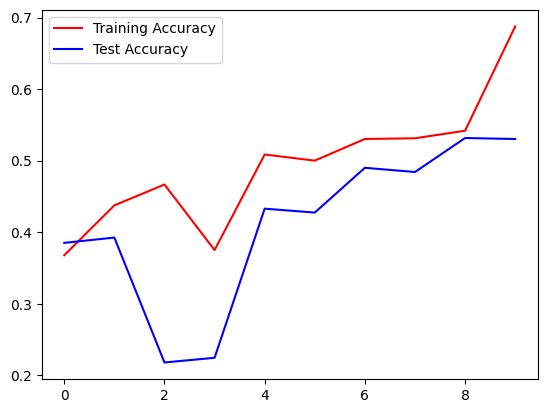

In [29]:
plt.plot(mod.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(mod.history['val_accuracy'], color='blue', label='Test Accuracy')
plt.legend()
plt.show()

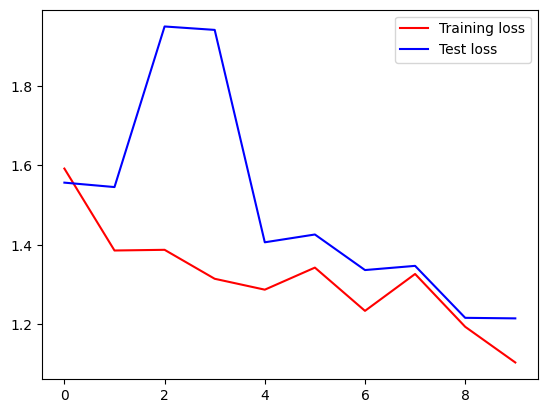

In [30]:
plt.plot(mod.history['loss'], color='red', label='Training loss')
plt.plot(mod.history['val_loss'], color='blue', label='Test loss')
plt.legend()
plt.show()

In [31]:
mod=model.fit(train_generator,steps_per_epoch=steps_per_epoch,epochs=50,validation_data=validation_generator)

Epoch 1/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 45s 50ms/step - accuracy: 0.5595 - loss: 1.1623 - val_accuracy: 0.5311 - val_loss: 1.2415
Epoch 2/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5000 - loss: 1.3916 - val_accuracy: 0.5337 - val_loss: 1.2373
Epoch 3/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - accuracy: 0.5627 - loss: 1.1434 - val_accuracy: 0.5337 - val_loss: 1.2304
Epoch 4/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5312 - loss: 1.0455 - val_accuracy: 0.5269 - val_loss: 1.2480
Epoch 5/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 76s 49ms/step - accuracy: 0.5784 - loss: 1.1093 - val_accuracy: 0.5552 - val_loss: 1.1482
Epoch 6/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5312 - loss: 1.0776 - val_accuracy: 0.5560 - val_loss: 1.1480
Epoch 7/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 45s 50ms/step - accuracy: 0.5813 - loss: 1.0959 - val_accuracy: 0.5450 - val_loss: 1.1660
Epoch 8/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6562 - loss: 0.9604 - val_accu

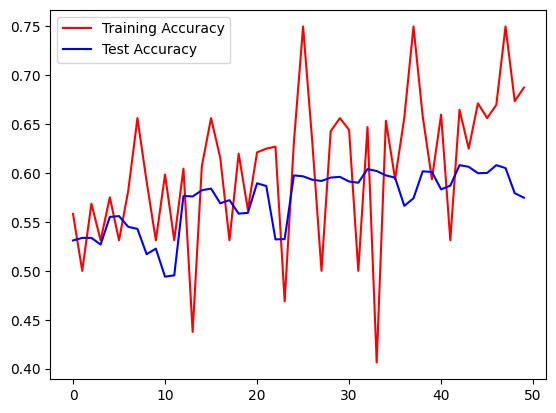

In [32]:
plt.plot(mod.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(mod.history['val_accuracy'], color='blue', label='Test Accuracy')
plt.legend()
plt.show()

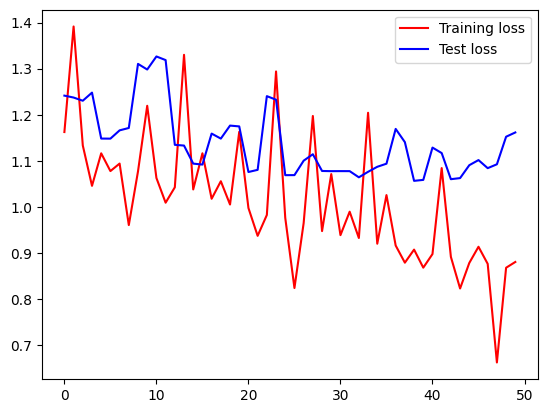

In [33]:
plt.plot(mod.history['loss'], color='red', label='Training loss')
plt.plot(mod.history['val_loss'], color='blue', label='Test loss')
plt.legend()
plt.show()

In [34]:
mod=model.fit(train_generator,steps_per_epoch=steps_per_epoch,epochs=80,validation_data=validation_generator)

Epoch 1/80
897/897 ━━━━━━━━━━━━━━━━━━━━ 52s 57ms/step - accuracy: 0.6765 - loss: 0.8557 - val_accuracy: 0.6106 - val_loss: 1.0724
Epoch 2/80
897/897 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6250 - loss: 1.2715 - val_accuracy: 0.6073 - val_loss: 1.0804
Epoch 3/80
897/897 ━━━━━━━━━━━━━━━━━━━━ 53s 59ms/step - accuracy: 0.6881 - loss: 0.8329 - val_accuracy: 0.6158 - val_loss: 1.0561
Epoch 4/80
897/897 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6250 - loss: 0.9205 - val_accuracy: 0.6152 - val_loss: 1.0581
Epoch 5/80
897/897 ━━━━━━━━━━━━━━━━━━━━ 76s 58ms/step - accuracy: 0.6843 - loss: 0.8378 - val_accuracy: 0.6176 - val_loss: 1.0724
Epoch 6/80
897/897 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8438 - loss: 0.6783 - val_accuracy: 0.6184 - val_loss: 1.0712
Epoch 7/80
897/897 ━━━━━━━━━━━━━━━━━━━━ 53s 58ms/step - accuracy: 0.6922 - loss: 0.8185 - val_accuracy: 0.5890 - val_loss: 1.1162
Epoch 8/80
897/897 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6250 - loss: 0.9277 - val_accu

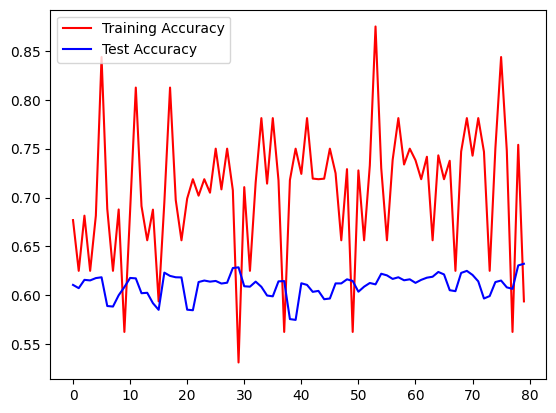

In [35]:
plt.plot(mod.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(mod.history['val_accuracy'], color='blue', label='Test Accuracy')
plt.legend()
plt.show()

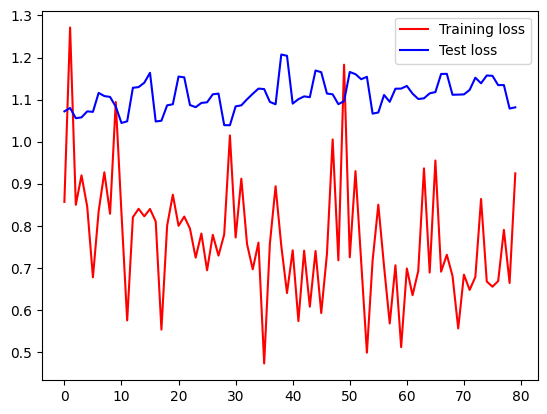

In [36]:
plt.plot(mod.history['loss'], color='red', label='Training loss')
plt.plot(mod.history['val_loss'], color='blue', label='Test loss')
plt.legend()
plt.show()

In [37]:
test_img = cv2.imread('/content/test/happy/PrivateTest_10077120.jpg')

array([[[200, 200, 200],
        [208, 208, 208],
        [186, 186, 186],
        ...,
        [ 79,  79,  79],
        [ 84,  84,  84],
        [105, 105, 105]],

       [[202, 202, 202],
        [202, 202, 202],
        [181, 181, 181],
        ...,
        [ 78,  78,  78],
        [ 95,  95,  95],
        [ 91,  91,  91]],

       [[224, 224, 224],
        [197, 197, 197],
        [168, 168, 168],
        ...,
        [ 80,  80,  80],
        [ 75,  75,  75],
        [ 92,  92,  92]],

       ...,

       [[194, 194, 194],
        [168, 168, 168],
        [189, 189, 189],
        ...,
        [188, 188, 188],
        [158, 158, 158],
        [154, 154, 154]],

       [[204, 204, 204],
        [171, 171, 171],
        [165, 165, 165],
        ...,
        [138, 138, 138],
        [120, 120, 120],
        [ 86,  86,  86]],

       [[152, 152, 152],
        [197, 197, 197],
        [147, 147, 147],
        ...,
        [129, 129, 129],
        [136, 136, 136],
        [121, 121, 121]]], dtype=uint8)
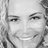

In [38]:
test_img

In [40]:
input_img=test_img.reshape(1,48,48,3)

In [43]:
model.predict(input_img)[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


0.055094186

In [114]:
test_img2=cv2.imread('/content/test/angry/PrivateTest_14433751.jpg')

array([[[ 89,  89,  89],
        [118, 118, 118],
        [157, 157, 157],
        ...,
        [213, 213, 213],
        [208, 208, 208],
        [143, 143, 143]],

       [[ 99,  99,  99],
        [135, 135, 135],
        [164, 164, 164],
        ...,
        [208, 208, 208],
        [210, 210, 210],
        [136, 136, 136]],

       [[116, 116, 116],
        [156, 156, 156],
        [170, 170, 170],
        ...,
        [211, 211, 211],
        [204, 204, 204],
        [134, 134, 134]],

       ...,

       [[138, 138, 138],
        [136, 136, 136],
        [125, 125, 125],
        ...,
        [252, 252, 252],
        [254, 254, 254],
        [254, 254, 254]],

       [[146, 146, 146],
        [137, 137, 137],
        [134, 134, 134],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[153, 153, 153],
        [145, 145, 145],
        [148, 148, 148],
        ...,
        [254, 254, 254],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
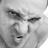

In [115]:
test_img2

In [116]:
input_img=test_img2.reshape(1,48,48,3)

In [117]:
output=model.predict(input_img)
output

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([[0.54911107, 0.00133118, 0.02859967, 0.36555162, 0.01188079,
        0.00944597, 0.03407973]], dtype=float32)

In [118]:
emotions = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

# Flatten the output array (extract the probabilities from the 2D array)
output_flat = output.flatten()

# Get the index of the maximum probability
predicted_index = np.argmax(output_flat)

# Map the index to the corresponding emotion
predicted_emotion = emotions[predicted_index]

print("Predicted Emotion:", predicted_emotion)

Predicted Emotion: Angry


In [119]:
def EmotionPrediction(img):
  input_img=img.reshape(1,48,48,3)
  output=model.predict(input_img)
  print(f'output array: {output}')
  emotions = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

  # Flatten the output array (extract the probabilities from the 2D array)
  output_flat = output.flatten()

  # Get the index of the maximum probability
  predicted_index = np.argmax(output_flat)

  # Map the index to the corresponding emotion
  predicted_emotion = emotions[predicted_index]
  print("Predicted Emotion:", predicted_emotion)
  return 0

array([[[133, 133, 133],
        [132, 132, 132],
        [129, 129, 129],
        ...,
        [ 31,  31,  31],
        [ 31,  31,  31],
        [ 38,  38,  38]],

       [[130, 130, 130],
        [133, 133, 133],
        [125, 125, 125],
        ...,
        [ 28,  28,  28],
        [ 35,  35,  35],
        [ 27,  27,  27]],

       [[131, 131, 131],
        [135, 135, 135],
        [135, 135, 135],
        ...,
        [ 23,  23,  23],
        [ 31,  31,  31],
        [ 31,  31,  31]],

       ...,

       [[ 37,  37,  37],
        [ 30,  30,  30],
        [ 37,  37,  37],
        ...,
        [ 35,  35,  35],
        [ 34,  34,  34],
        [ 13,  13,  13]],

       [[ 32,  32,  32],
        [ 33,  33,  33],
        [ 32,  32,  32],
        ...,
        [ 59,  59,  59],
        [ 15,  15,  15],
        [ 12,  12,  12]],

       [[ 29,  29,  29],
        [ 29,  29,  29],
        [ 26,  26,  26],
        ...,
        [ 22,  22,  22],
        [ 10,  10,  10],
        [ 11,  11,  11]]], dtype=uint8)
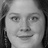

In [131]:
img=cv2.imread('/content/test/neutral/PrivateTest_19416537.jpg')
img

In [132]:
EmotionPrediction(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
output array: [[2.7467762e-04 4.9950864e-07 1.4801237e-03 9.8879528e-01 5.5421758e-03
  2.1655010e-03 1.7416136e-03]]
Predicted Emotion: Happy


0

In [133]:
model.evaluate(train_generator)

898/898 ━━━━━━━━━━━━━━━━━━━━ 45s 50ms/step - accuracy: 0.7577 - loss: 0.6426


[0.6452797651290894, 0.7576718330383301]

In [135]:
model.evaluate(validation_generator)

225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6342 - loss: 1.0702


[1.0819199085235596, 0.6322095394134521]

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3),strides=1,padding='valid',activation='relu',kernel_regularizer= regularizers.l2(0.01),input_shape=(48,48,3))),
model.add(Dropout(0.5))
model.add(BatchNormalization()),
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid')),

model.add(Conv2D(64, kernel_size=(3,3),strides=1,padding='valid',activation='relu',kernel_regularizer= regularizers.l2(0.01),input_shape=(48,48,3))),
model.add(Dropout(0.5))
model.add(BatchNormalization()),
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid')),

model.add(Conv2D(128, kernel_size=(3,3),strides=1,padding='valid',activation='relu',kernel_regularizer= regularizers.l2(0.01),input_shape=(48,48,3))),
model.add(Dropout(0.5))
model.add(BatchNormalization()),
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid')),

model.add(Reshape((16, 128)))
model.add(LSTM(64, return_sequences=True,kernel_regularizer= regularizers.l2(0.01))),  # Return sequences for another LSTM layer
model.add(Dropout(0.5))
model.add(LSTM(64))  # Final LSTM layer

model.add(Dense(128,activation='relu',kernel_regularizer= regularizers.l2(0.01))),
model.add(Dense(64,activation='relu',kernel_regularizer= regularizers.l2(0.01))),
model.add(Dense(7,activation='softmax'))



In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
mod=model.fit(train_generator,steps_per_epoch=steps_per_epoch,epochs=50,validation_data=validation_generator)

In [ ]:
plt.plot(mod.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(mod.history['val_accuracy'], color='blue', label='Test Accuracy')
plt.legend()
plt.show()

In [ ]:
plt.plot(mod.history['loss'], color='red', label='Training loss')
plt.plot(mod.history['val_loss'], color='blue', label='Test loss')
plt.legend()
plt.show()

In [ ]:
model.evaluate(train_generator)

In [ ]:
model.evaluate(validation_generator)

In [ ]:
from tensorflow.keras.applications import  VGG16

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

In [ ]:
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Input

In [ ]:
# Load pre-trained VGG16 model without the top classification layers
# and with a specific input shape
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Freeze layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Define the input layer with the desired shape
input_tensor = Input(shape=(48, 48, 3))

# Pass the input through the base model
x = base_model(input_tensor)

# Build the custom model using the Functional API
model = models.Model(inputs=input_tensor, outputs=x)  # Create a Keras Model

# Add a Global Average Pooling layer
# Add a Global Average Pooling layer to reduce to a 1D tensor
x = layers.GlobalAveragePooling2D()(x)

# Check the output shape after GlobalAveragePooling2D
print("Shape after GlobalAveragePooling2D:", x.shape)  # Debugging step

# Now reshape explicitly for the LSTM layer
# We expect x.shape[1] here to be compatible with the LSTM layer's input
x = layers.Reshape((1, x.shape[1]))(x)  # Reshape to (batch_size, time_steps=1, features)

# Add LSTM layers and other layers as needed...
x = layers.LSTM(64, return_sequences=True)(x)
x = layers.LSTM(64)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
output_tensor = layers.Dense(7, activation='softmax')(x)

# Create the final model
model = models.Model(inputs=input_tensor, outputs=output_tensor)

# Display the model summary
model.summary()

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
mod=model.fit(train_generator,steps_per_epoch=steps_per_epoch,epochs=50,validation_data=validation_generator)

In [ ]:
plt.plot(mod.history['loss'], color='red', label='Training loss')
plt.plot(mod.history['val_loss'], color='blue', label='Test loss')
plt.legend()
plt.show()

In [ ]:
plt.plot(mod.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(mod.history['val_accuracy'], color='blue', label='Test Accuracy')
plt.legend()
plt.show()

In [ ]:
model.evaluate(train_generator)
model.evaluate(validation_generator)

In [ ]:
mod=model.fit(train_generator,steps_per_epoch=steps_per_epoch,epochs=100,validation_data=validation_generator)